<a href="https://colab.research.google.com/github/sanjaykrishu/Myproject/blob/main/Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

Loading Dataset

In [65]:
df = pd.read_csv('Telco-Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
cat_cols = [col for col in df.columns if df[col].dtype=='object']
cat_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [38]:
# dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [39]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [40]:
df = df.drop(columns='customerID')

In [41]:
#change TotalCharges to numeric datatype
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [42]:
# display null values
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [43]:
# drop rows where tenure is zero
df = df.drop(labels=df[df['tenure']==0].index, axis=0)
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


Exploratory Data Analysis

<Axes: title={'center': 'Churn Count'}, xlabel='Churn', ylabel='count'>

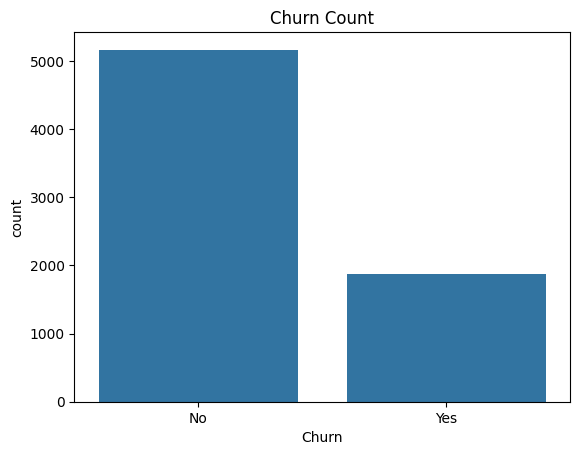

In [44]:
plt.title('Churn Count')
sns.countplot(x = 'Churn', data = df)

<Axes: xlabel='Churn', ylabel='count'>

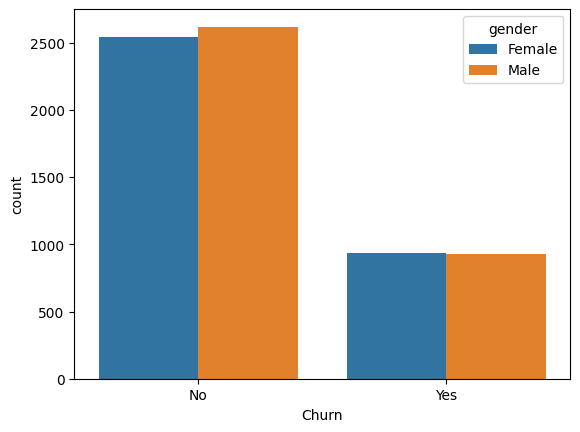

In [45]:
sns.countplot(x='Churn', hue='gender', data=df)

<Axes: xlabel='Churn', ylabel='count'>

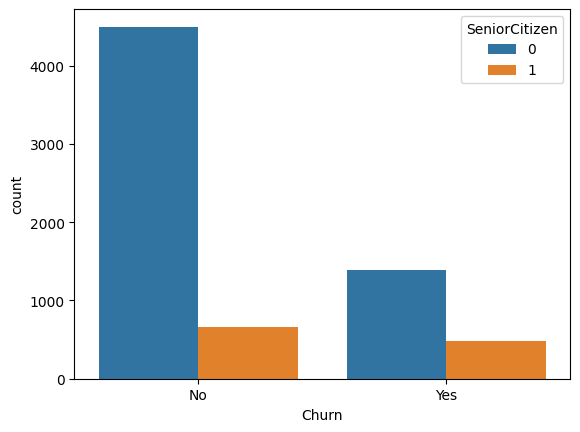

In [46]:
sns.countplot(x='Churn', hue='SeniorCitizen', data=df)

<Axes: xlabel='Churn', ylabel='count'>

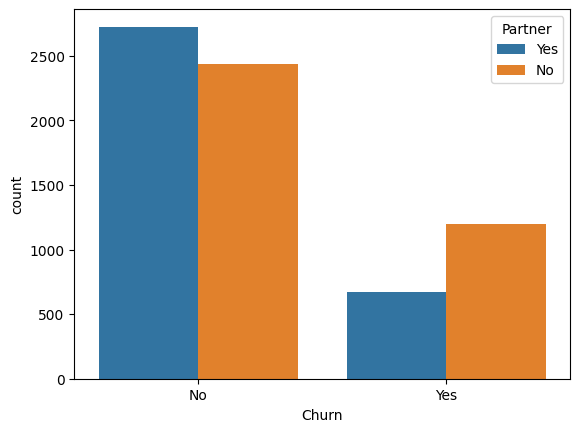

In [47]:
sns.countplot(x='Churn', hue='Partner', data=df)

People who doesn't have partner are more like to get churn

<Axes: xlabel='Churn', ylabel='count'>

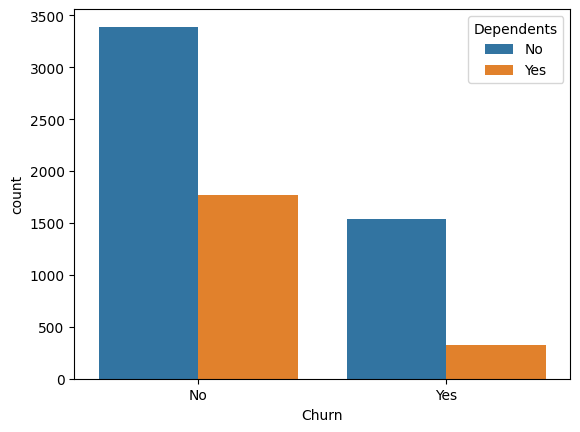

In [48]:
sns.countplot(x='Churn', hue='Dependents', data=df)

Same as the previous graph shows people doesn't have partners and no dependents are likely to churn.

<Axes: xlabel='Churn', ylabel='count'>

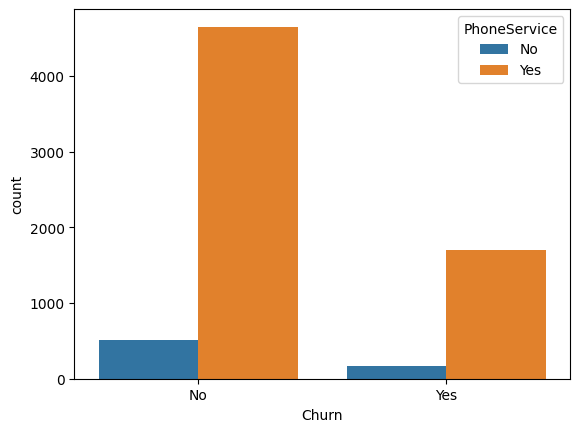

In [49]:
sns.countplot(x='Churn', hue='PhoneService', data=df)

People who have phone service are likely to churn

<Axes: xlabel='Churn', ylabel='count'>

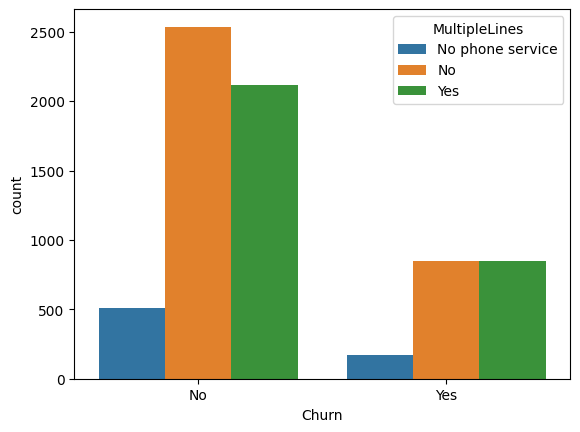

In [50]:
sns.countplot(x='Churn', hue='MultipleLines', data=df)

<Axes: xlabel='Churn', ylabel='count'>

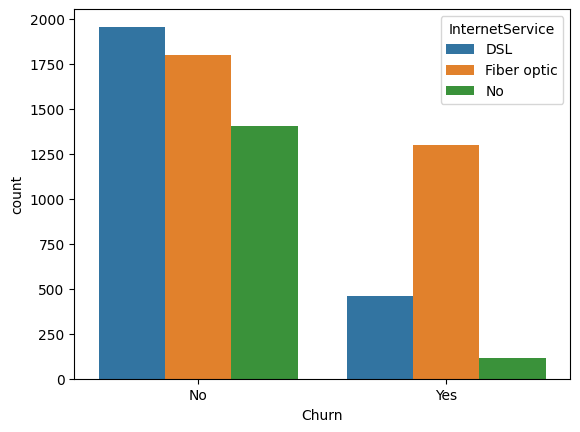

In [51]:
sns.countplot(x='Churn', hue='InternetService', data=df)

Those who have opted for fiber optics are more likelt to churn and on the contrary, those who have DSL service have more retention.

<Axes: xlabel='Churn', ylabel='count'>

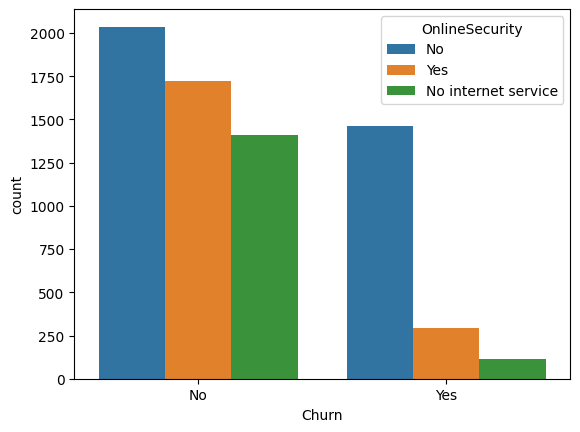

In [52]:
sns.countplot(x='Churn', hue='OnlineSecurity', data=df)

People who doesn't have online security are more likely to churn.

<Axes: xlabel='Churn', ylabel='count'>

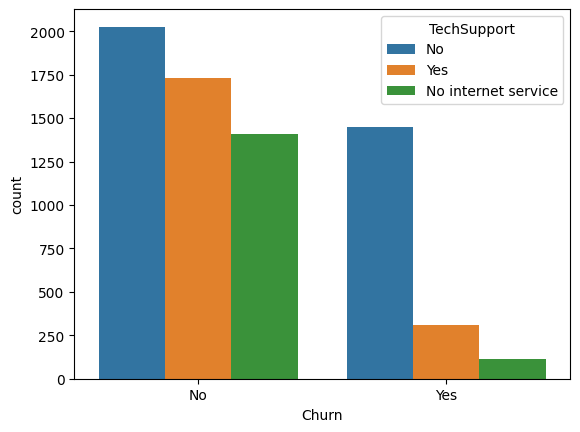

In [53]:
sns.countplot(x='Churn', hue='TechSupport', data=df)

People who doesn't have tech support are more likely to churn

<Axes: xlabel='Churn', ylabel='count'>

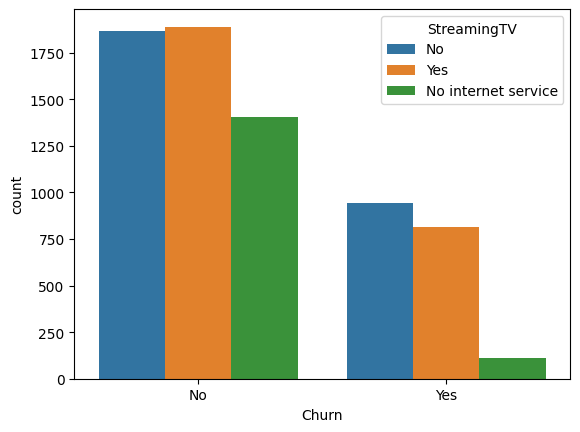

In [54]:
sns.countplot(x='Churn', hue='StreamingTV', data=df)

<Axes: xlabel='Churn', ylabel='count'>

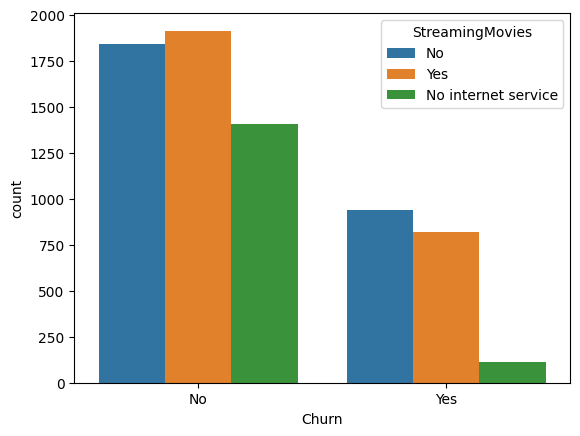

In [55]:
sns.countplot(x='Churn', hue='StreamingMovies', data=df)

<Axes: xlabel='Churn', ylabel='count'>

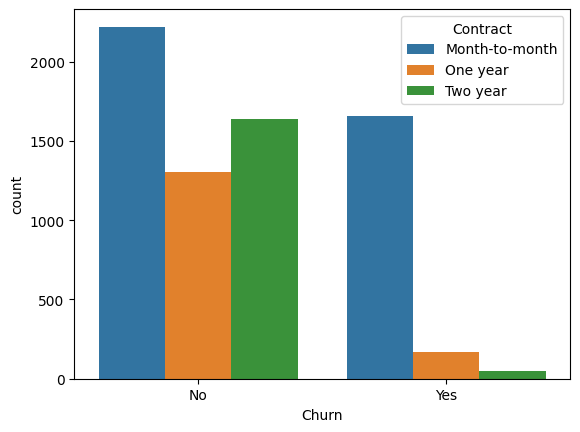

In [56]:
sns.countplot(x='Churn', hue='Contract', data=df)

People who have month-to-month contract are more likely to churn and people who have yearly contract are less likely to churn

<Axes: xlabel='Churn', ylabel='count'>

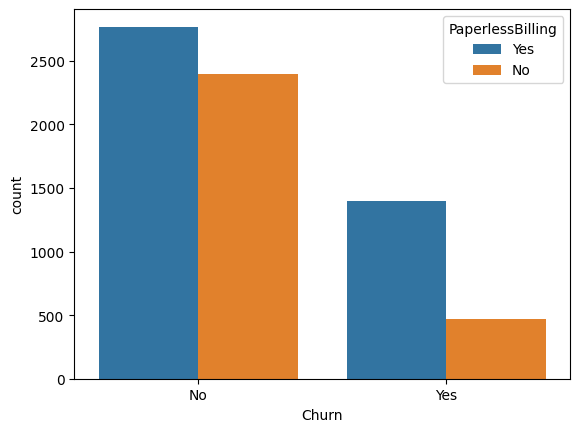

In [57]:
sns.countplot(x='Churn', hue='PaperlessBilling', data=df)

<Axes: xlabel='Churn', ylabel='count'>

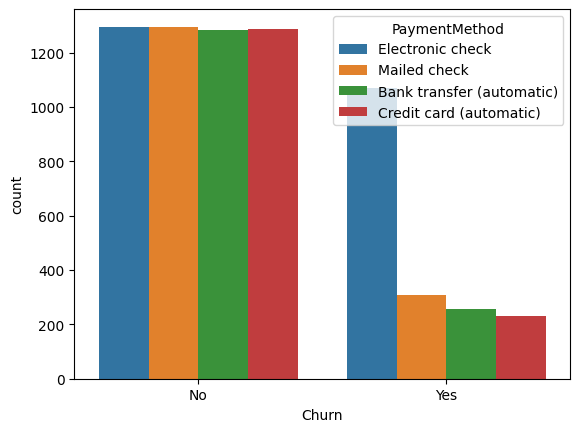

In [58]:
sns.countplot(x='Churn', hue='PaymentMethod', data=df)

People who have opted ffor electronic check payment method are more likely to churn

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

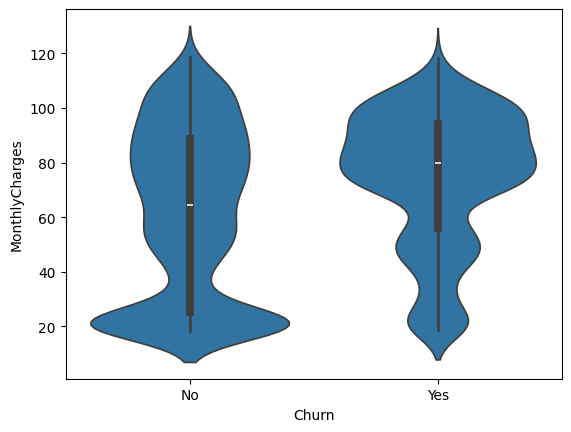

In [59]:
sns.violinplot(x='Churn', y='MonthlyCharges', data=df)

People who have more monthly charges are likely to churn

<Axes: xlabel='Churn', ylabel='TotalCharges'>

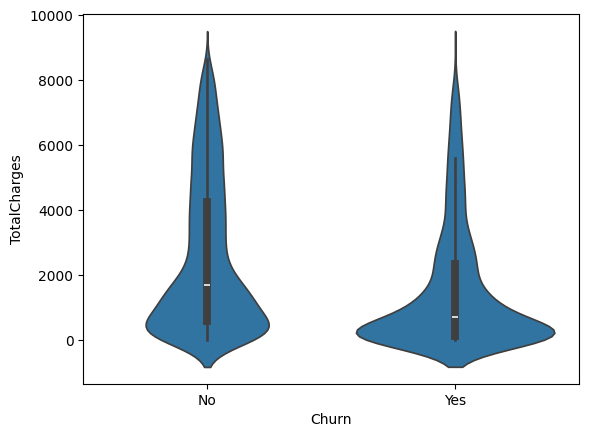

In [60]:
sns.violinplot(x='Churn', y='TotalCharges', data=df)

<Axes: xlabel='Churn', ylabel='tenure'>

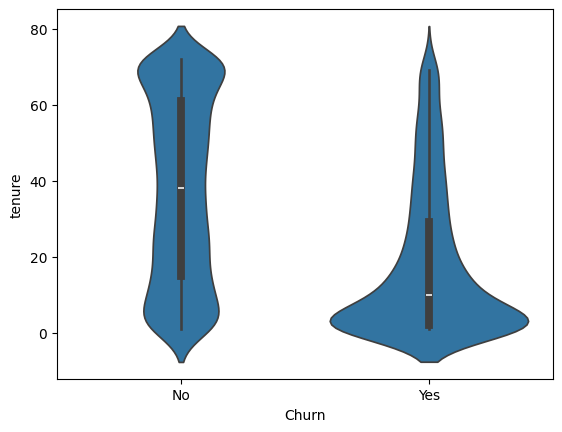

In [61]:
sns.violinplot(x='Churn', y='tenure', data=df)

People who have low tenure are more likely to churn

<Axes: xlabel='Churn', ylabel='tenure'>

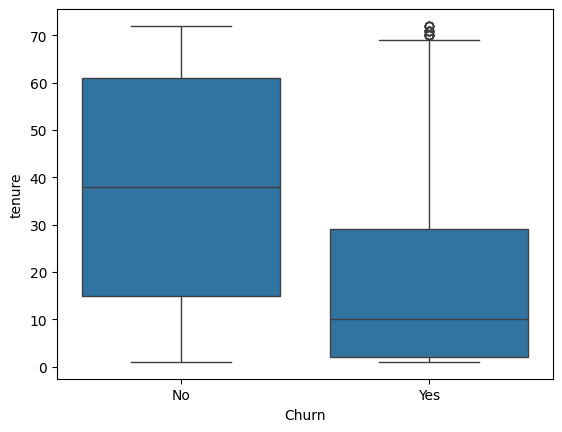

In [62]:
sns.boxplot(x='Churn', y='tenure', data=df)

Correlation Matrix

<Axes: >

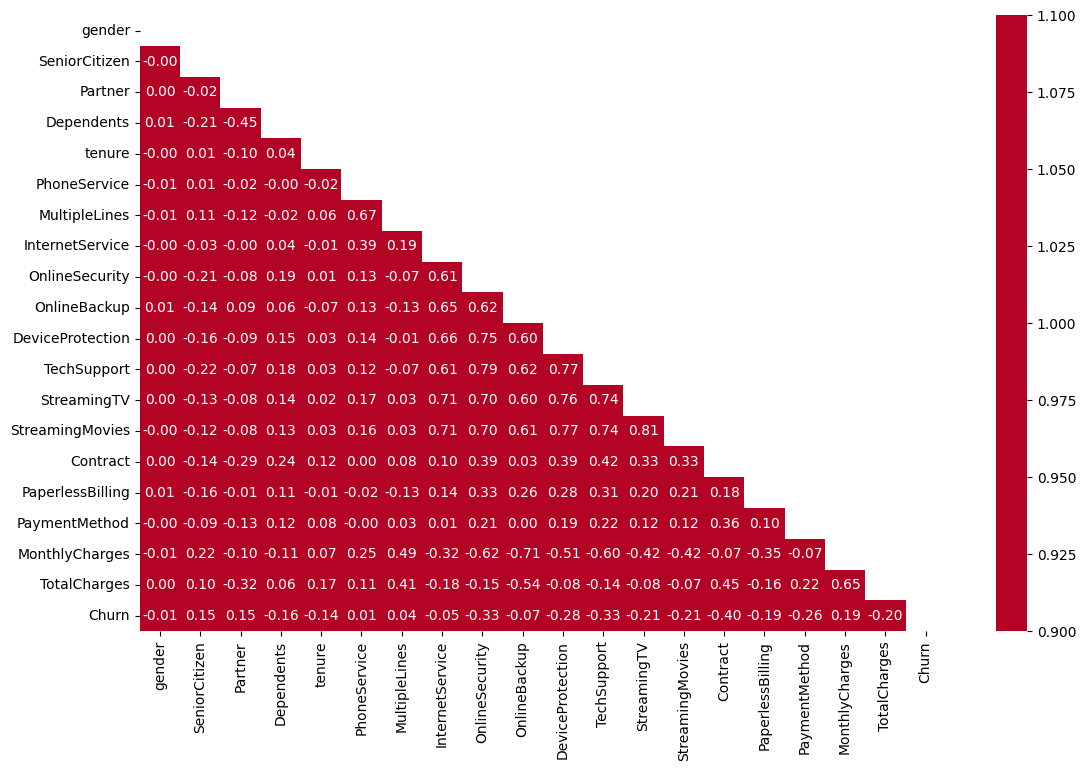

In [63]:
plt.figure(figsize=(13,8))
corr = df.apply(lambda x: pd.factorize(x)[0] if x.dtype!= 'float64' else x).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, vmin=1, center=0, annot=True, fmt='.2f')

Label Encoder

In [64]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [66]:
cols = [col for col in df.columns if df[col].dtype=='object']
cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [68]:
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
df.head(2)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0


In [69]:
# perform log transformation
df['MonthlyCharges'] = np.log(df['MonthlyCharges']+1)
df['TotalCharges'] = np.log(df['TotalCharges']+1)

<Axes: xlabel='TotalCharges', ylabel='Density'>

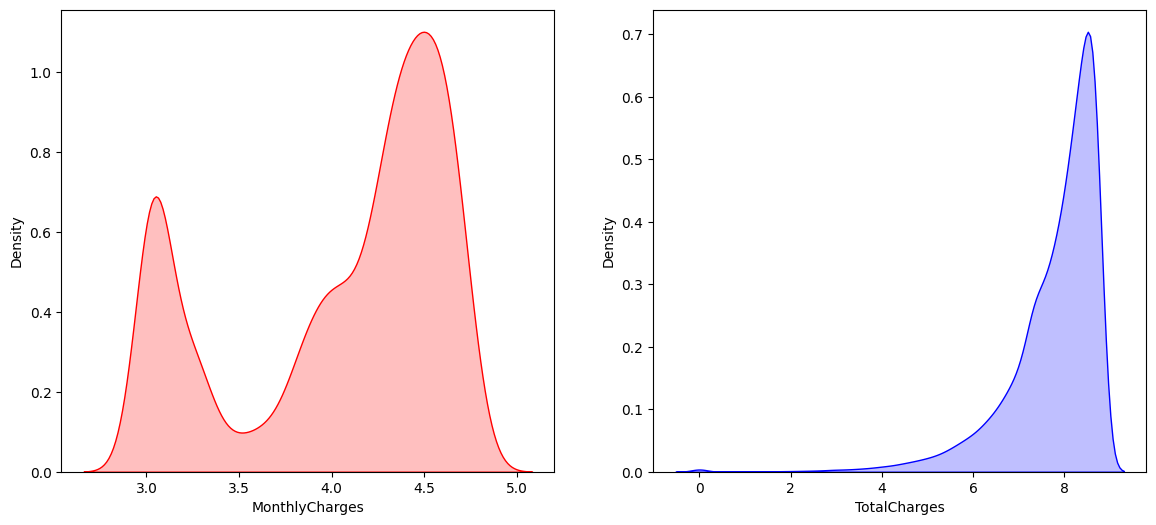

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
sns.kdeplot(df['MonthlyCharges'], ax=axes[0], color='red', shade=True)
sns.kdeplot(df['TotalCharges'],ax=axes[1], color='blue', shade=True)

Train Test Split

In [72]:
x = df.drop(columns=['Churn'])
y = df['Churn']

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

Model Training

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#initialize and train model
model = LogisticRegression()
model.fit(x_train, y_train)

# get predictions
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.62      0.53      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



In [78]:
from sklearn.ensemble import RandomForestClassifier

#initialize and train model
model = RandomForestClassifier()
model.fit(x_train, y_train)

# get predictions
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1035
           1       0.65      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.79      1409



Confusion Matrix

<Axes: >

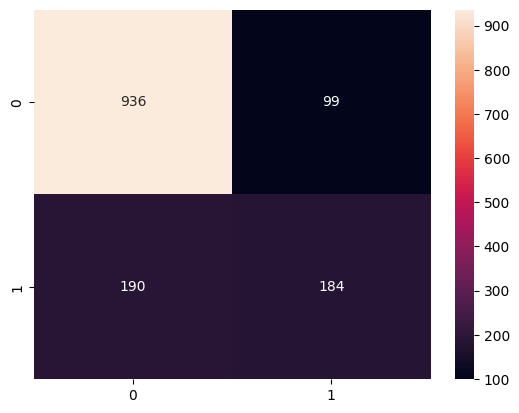

In [79]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')